## Clustering- Assignment 07_Crime
## Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [2]:
# Reading the data
data = pd.read_csv("D:\Assignment\Assignments-7\crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
# Shape of the data(No of rows and columns)
data.shape

(50, 5)

In [4]:
#Checking for the missing values and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
# Describing the data
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
# Checking for duplicate rows
data[data.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


In [7]:
#Coolumns
data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
    #Droping the first column as it is a categorical and not relevent in clustering
data1 = data.drop('Unnamed: 0', axis=1)
data1.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [9]:
## defining the normalize function
def n_data(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
# Normalizing data using the defined function
norm_data= n_data(data1)
norm_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [11]:
# Calculating the within clusters sum of squares to use it in the Elbow plot to determine 'K'
WCSS = []
for i in range(1,11):
    clf = KMeans(n_clusters=i)
    clf.fit(norm_data)
    WCSS.append(clf.inertia_)
WCSS

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[13.184122550256443,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859134,
 3.185021932472433,
 2.9230339802450462,
 2.591381418679343,
 2.313234785628794,
 2.1217419001900595,
 1.827218493551644]

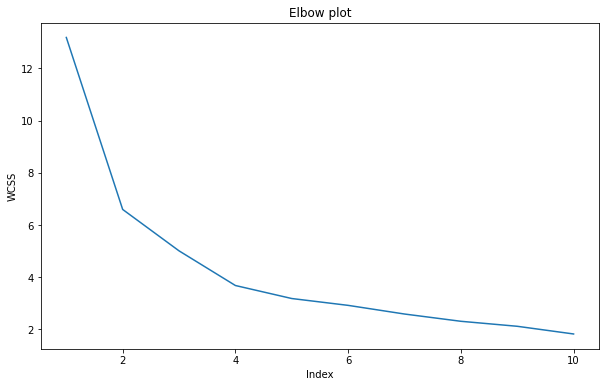

In [12]:
#Elbow plot
plt.figure(figsize=(10,6))
plt.plot(range(1,11),WCSS)
plt.xlabel('Index')
plt.ylabel('WCSS')
plt.title("Elbow plot")
plt.show() #Using the following plot considering k=4

## 1.Using KMeans clustering

In [13]:
#Building the KMeans
clusters = KMeans(n_clusters =4, random_state=30)
clusters.fit(norm_data)
clusters.labels_

array([3, 2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 0, 2, 1, 0, 1, 0, 3, 0, 2, 1, 2,
       0, 3, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0, 1, 1, 1, 1, 1, 3, 0, 3, 2, 1,
       0, 1, 1, 0, 0, 1])

In [14]:
# Creating a duplicate data set
data2 =data.copy()

In [15]:
# Adding the predicted labels to the data set
data2['clust'] = clusters.labels_
data2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2


In [16]:
#Grouping the labels to form clusters
data2.groupby('clust').agg('mean').reset_index()

,clust,Murder,Assault,UrbanPop,Rape
0,0,3.600000,78.538462,52.076923,12.176923
1,1,5.656250,138.875000,73.875000,18.781250
2,2,10.815385,257.384615,76.000000,33.192308
3,3,13.937500,243.625000,53.750000,21.412500


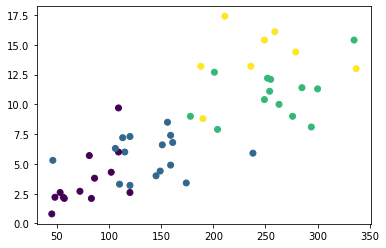

In [17]:
# plotting the clusters
plt.scatter(data2['Assault'],data2['Murder'], c= clusters.labels_)
plt.show()

## Using H-clustering

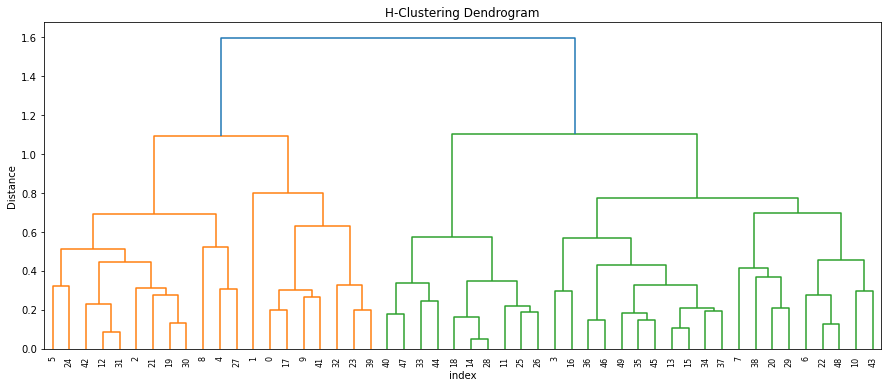

In [19]:
# calculating the Hyper parameters k unsing Dendrogram
plt.figure(figsize=(15,6))
plt.xlabel("index")
plt.ylabel("Distance")
plt.title('H-Clustering Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(norm_data,method='complete',metric ='euclidean'))
#considering k =4 from the following dedrogram

In [20]:
# Building the H-Clustering algorithm
h_clusters = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage = 'complete')
h_clusters.fit(norm_data)
h_clusters.labels_

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [21]:
#Creating the duplicate data
data3 = data.copy()
data3.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [22]:
#Adding the predicted cluster labels to the data set
data3['clust'] = h_clusters.labels_
data3.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [23]:
# Grouping the data to create the clusters
data3.groupby('clust').agg('mean').reset_index()

,clust,Murder,Assault,UrbanPop,Rape
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


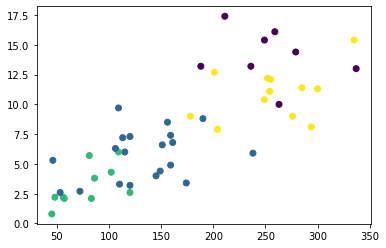

In [24]:
# Plotting the clusters
plt.scatter(data3['Assault'],data3['Murder'],c= h_clusters.labels_)
plt.show()

## 3. Using DBSCAN

In [25]:
#Building the DBSAN algorithm
dbscan = DBSCAN(eps= 0.25,min_samples=4)
dbscan.fit(norm_data)
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  2, -1,  1, -1,  1,  1,  1, -1,  1,  2, -1, -1, -1,  1,
        1,  1,  1,  1,  2,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [26]:
#Creatng the duplicate data set
data4 = data1.copy()

In [27]:
#Adding the predicted cluster labels to the dataset
data4['clust'] = dbscan.labels_
data4.head()

,Murder,Assault,UrbanPop,Rape,clust
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


In [28]:
#Grouping bata based on the cluster labels
data3.groupby('clust').agg('mean').reset_index()

,clust,Murder,Assault,UrbanPop,Rape
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


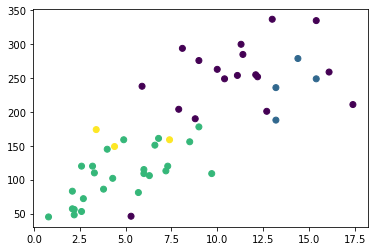

In [29]:
# Plotting the clusters
plt.scatter(data4['Murder'],data4['Assault'],c=dbscan.labels_)